# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

demo = pd.read_csv('demo01.csv')
demo.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [6]:
demo = pd.get_dummies(demo, columns=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first=True)
demo['mau'] = demo['mau'].map({False: 0, True: 1})


In [27]:
y = demo.mau
x = demo.drop('mau',axis=1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [24]:
x.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
sexo_M                                      uint8
posse_de_veiculo_Y                          uint8
posse_de_imovel_Y                           uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8
estado_civil_Married                        uint8


In [9]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train,y_train)

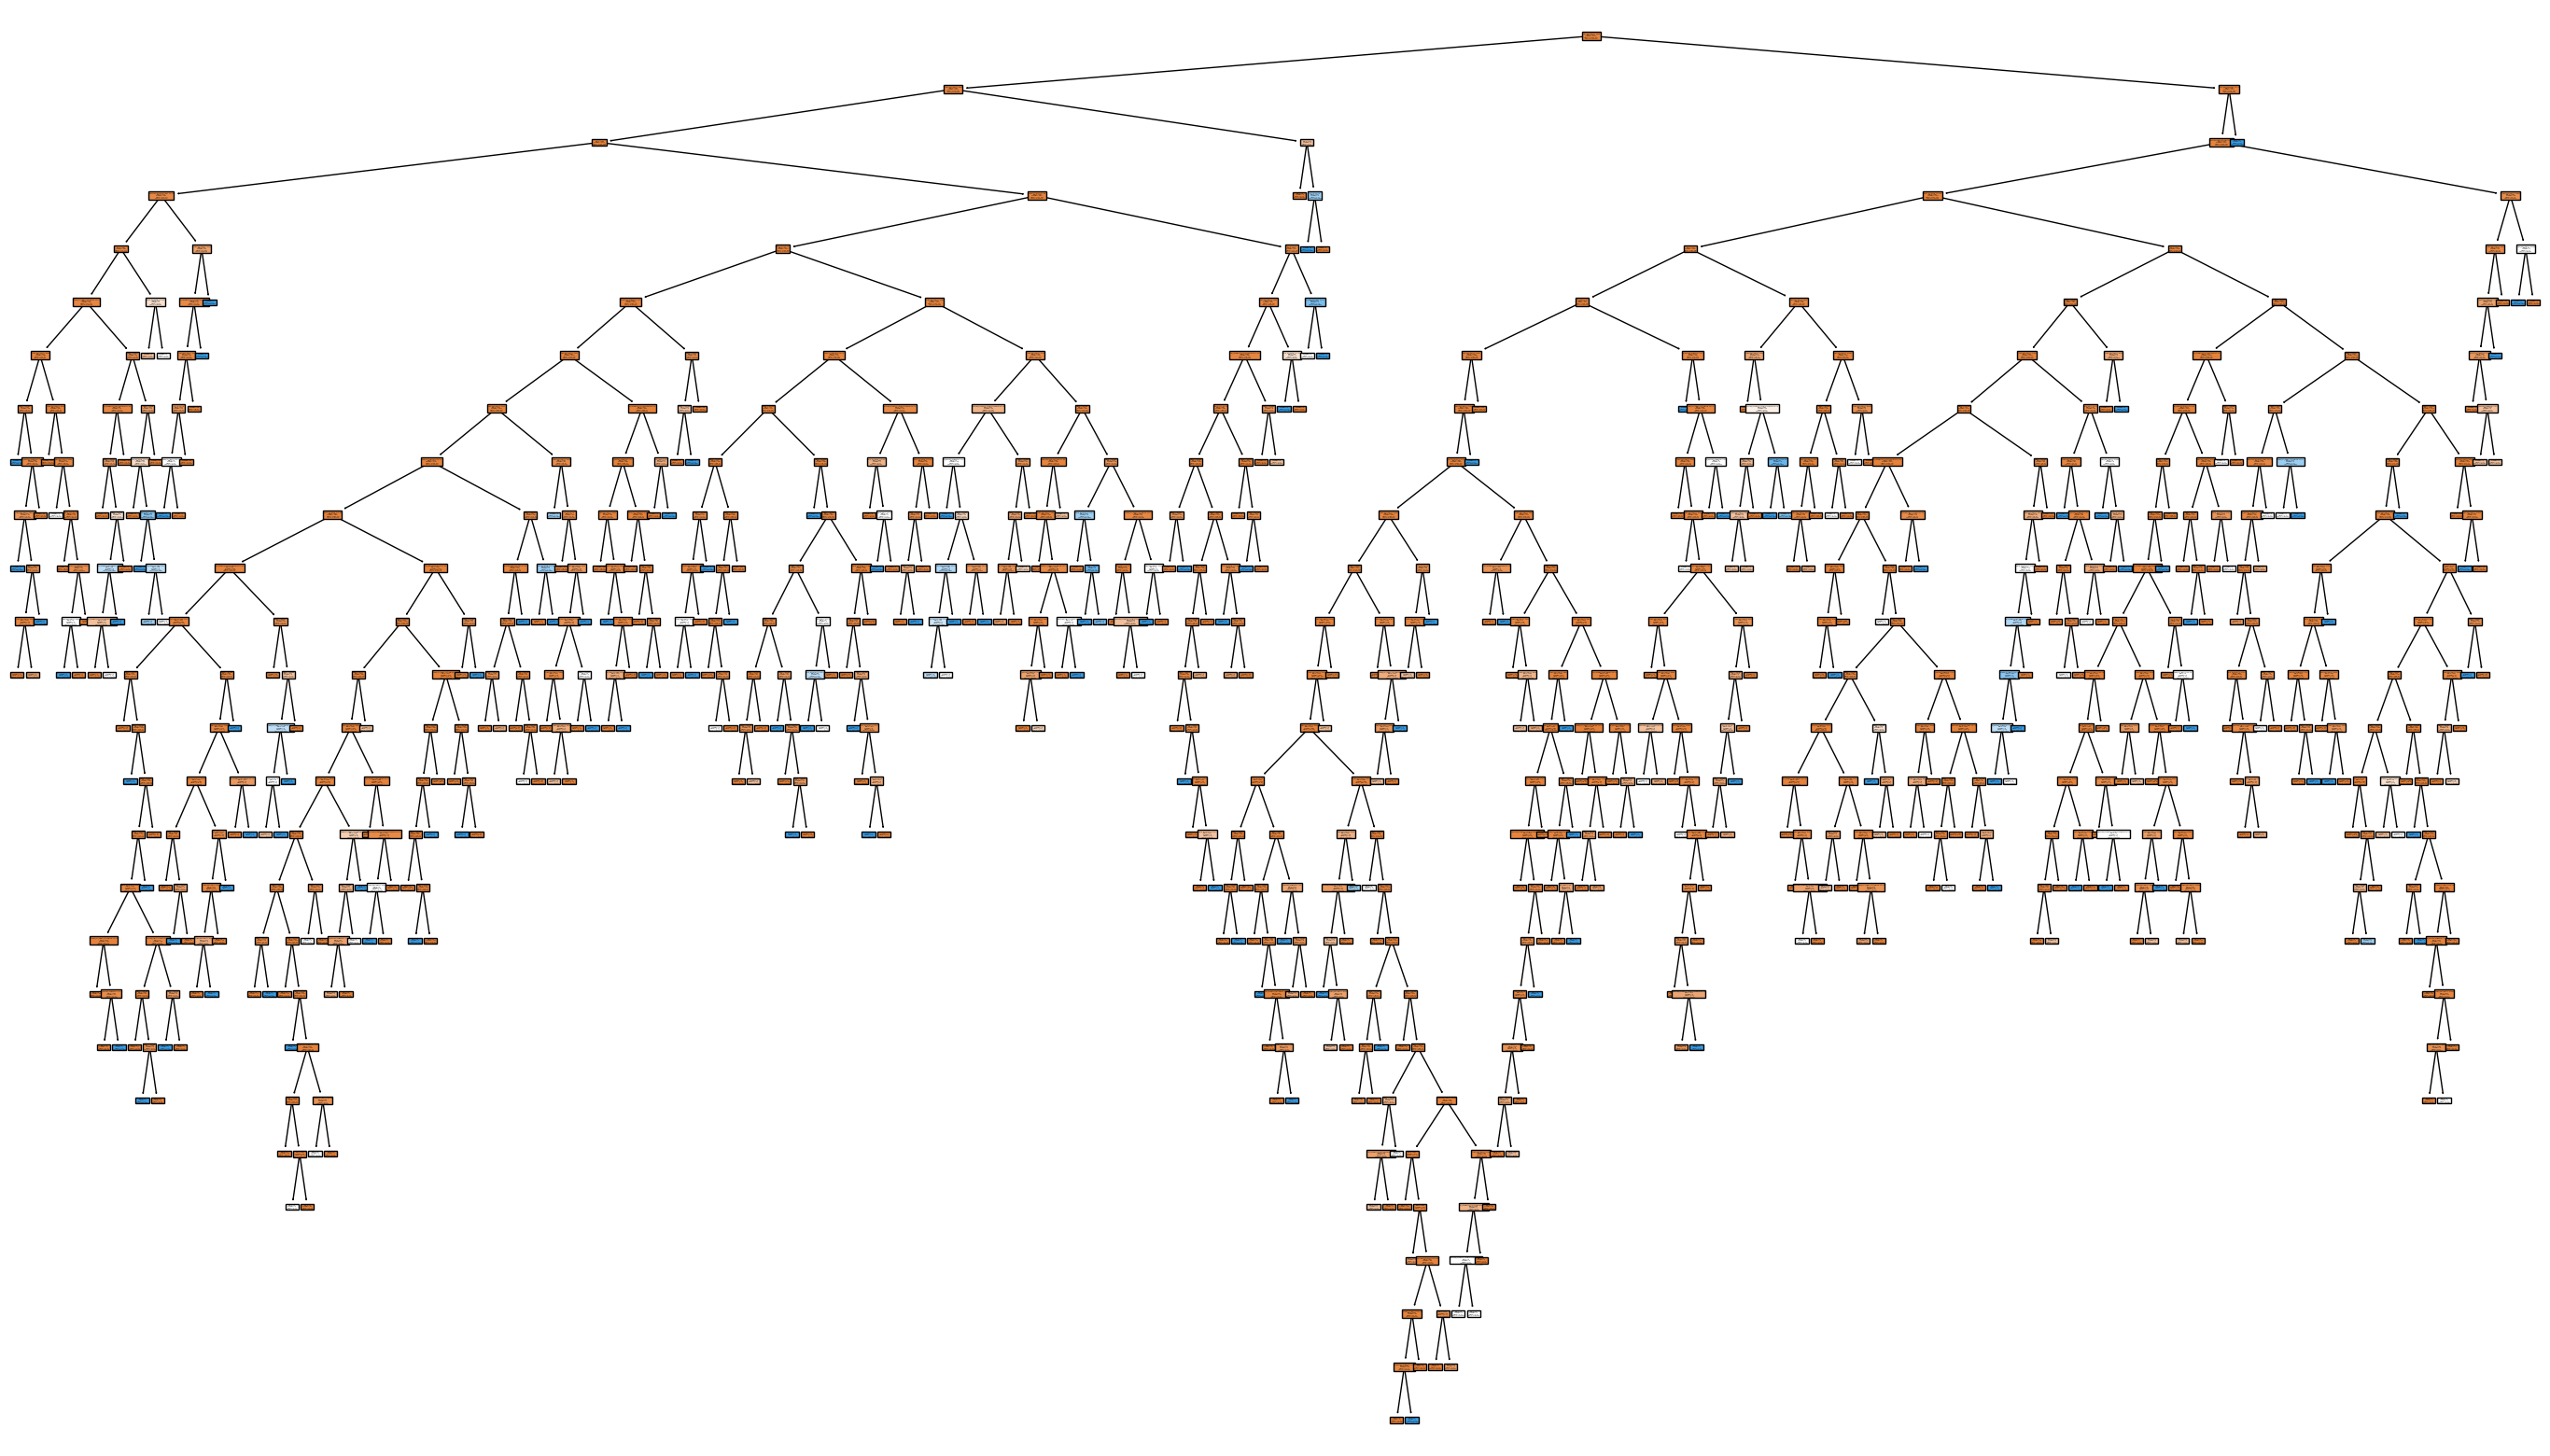

In [10]:
plt.figure(figsize=(35, 20))
plot_tree(clf,
          filled=True,
          class_names=['aprovados','reprovados'],
          feature_names=x.columns.to_list());

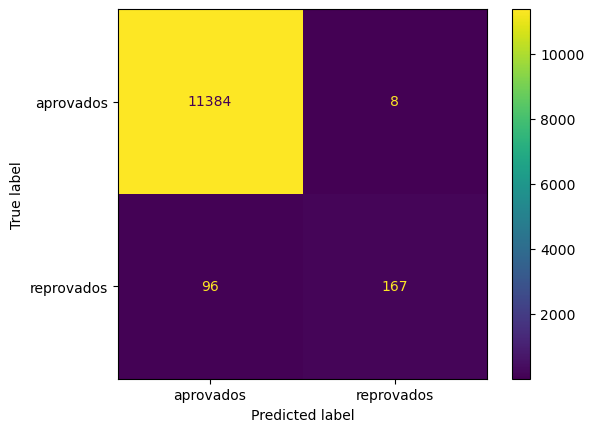

In [29]:
cm = confusion_matrix(y_train, clf.predict(x_train),labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot();

In [18]:
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [24]:
y_chapeu_teste = clf.predict(x_test)

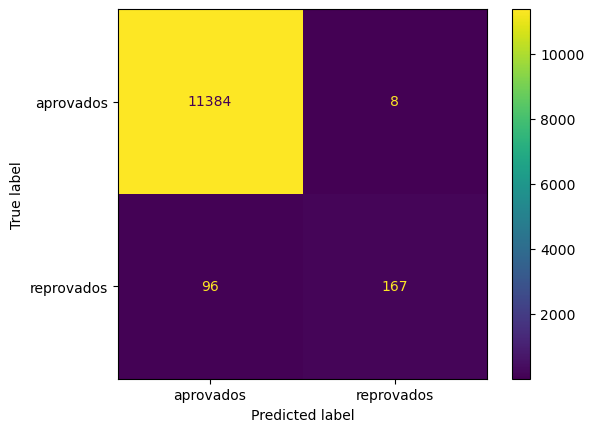

In [30]:
m = confusion_matrix(y_test, clf.predict(x_test),labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot();

In [23]:
pred = clf.predict(x_test)
accuracy_score(y_test, pred)

0.9683683683683684

In [32]:
clf = DecisionTreeClassifier(min_samples_leaf=80, max_depth=10 ,random_state=123)
clf = clf.fit(x_train,y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.9745745745745745